# Lesson 3: NumPy and Pandas for 2D Data

In [1]:
import numpy as np
import pandas as pd

## Two-Dimensional NumPy arrays

Find mean ridership and station with maximum ridership for given data for 5 stations on 10 different days.

In [2]:
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

def mean_riders_for_max_station(ridership):
    """
    :param ridership: 2D array of ridership data, each 1D sub-array containing data for all stations on one day.
    :return: a tuple containing the mean value over all days and stations, as well as the mean value for the station with most riders on the first day.
    """
    mean_overall = ridership.mean()
    max_station_on_1st_day_idx = ridership[0].argmax()
    max_station_on_1st_day_ridership = ridership[:,max_station_on_1st_day_idx]
    mean_for_max_station_on_1st_day = max_station_on_1st_day_ridership.mean()
    return mean_overall, mean_for_max_station_on_1st_day

mean_riders_for_max_station(ridership)

(2342.6, 3239.9)

Calculate the mean ridership for each station using the axis parameter.

In [3]:
def min_and_max_riders_per_day(ridership):
    """
    :param ridership: 2D array of ridership data, each 1D sub-array containing data for all stations on one day.
    :return: the minimum and maximum values of mean station ridership.
    """
    # we calculate the mean of each column, because a column represents a station
    mean_daily_ridership = ridership.mean(axis=0)

    max_daily_ridership = mean_daily_ridership.max()
    min_daily_ridership = mean_daily_ridership.min()

    return max_daily_ridership, min_daily_ridership

min_and_max_riders_per_day(ridership)

(3239.9, 1071.2)

## Accessing elements of a Pandas DataFrame

In [4]:
ridership_df = pd.DataFrame(
    data = ridership,
    index = ['2011-05-01', '2011-05-02', '2011-05-03', '2011-05-04', '2011-05-05',
             '2011-05-06', '2011-05-07', '2011-05-08', '2011-05-09', '2011-05-10'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007'])

ridership_df

,R003,R004,R005,R006,R007
2011-05-01,0,0,2,5,0
2011-05-02,1478,3877,3674,2328,2539
2011-05-03,1613,4088,3991,6461,2691
2011-05-04,1560,3392,3826,4787,2613
2011-05-05,1608,4802,3932,4477,2705
2011-05-06,1576,3933,3909,4979,2685
2011-05-07,95,229,255,496,201
2011-05-08,2,0,1,27,0
2011-05-09,1438,3785,3589,4174,2215
2011-05-10,1342,4043,4009,4665,3033


Get a row of the data frame by numerical index.

In [5]:
ridership_df.iloc[0]

R003    0
R004    0
R005    2
R006    5
R007    0
Name: 2011-05-01, dtype: int32

Get a column of the data frame by numerical index.

In [6]:
ridership_df.iloc[:, 0]

2011-05-01       0
2011-05-02    1478
2011-05-03    1613
2011-05-04    1560
2011-05-05    1608
2011-05-06    1576
2011-05-07      95
2011-05-08       2
2011-05-09    1438
2011-05-10    1342
Name: R003, dtype: int32

Get a row of the data frame by index.

In [7]:
ridership_df.loc['2011-05-01']

R003    0
R004    0
R005    2
R006    5
R007    0
Name: 2011-05-01, dtype: int32

Get a column of the data frame by index.

In [8]:
ridership_df['R003']

2011-05-01       0
2011-05-02    1478
2011-05-03    1613
2011-05-04    1560
2011-05-05    1608
2011-05-06    1576
2011-05-07      95
2011-05-08       2
2011-05-09    1438
2011-05-10    1342
Name: R003, dtype: int32

Get multiple rows by numerical index.

In [9]:
ridership_df.iloc[1:3]

,R003,R004,R005,R006,R007
2011-05-02,1478,3877,3674,2328,2539
2011-05-03,1613,4088,3991,6461,2691


Get multiple columns by numerical index.

In [10]:
ridership_df.iloc[:, 1:3]

,R004,R005
2011-05-01,0,2
2011-05-02,3877,3674
2011-05-03,4088,3991
2011-05-04,3392,3826
2011-05-05,4802,3932
2011-05-06,3933,3909
2011-05-07,229,255
2011-05-08,0,1
2011-05-09,3785,3589
2011-05-10,4043,4009


Get multiple rows by index.

In [11]:
ridership_df.loc[['2011-05-03', '2011-05-07']]

,R003,R004,R005,R006,R007
2011-05-03,1613,4088,3991,6461,2691
2011-05-07,95,229,255,496,201


Get multiple columns by index.

In [12]:
ridership_df[['R003', 'R006']]

,R003,R006
2011-05-01,0,5
2011-05-02,1478,2328
2011-05-03,1613,6461
2011-05-04,1560,4787
2011-05-05,1608,4477
2011-05-06,1576,4979
2011-05-07,95,496
2011-05-08,2,27
2011-05-09,1438,4174
2011-05-10,1342,4665


Compute mean values per row using `axis=0`.

In [13]:
ridership_df.mean(axis=0)

R003    1071.2
R004    2814.9
R005    2718.8
R006    3239.9
R007    1868.2
dtype: float64

Compute mean values per column using `axis=1`.

In [14]:
ridership_df.mean(axis=1)

2011-05-01       1.4
2011-05-02    2779.2
2011-05-03    3768.8
2011-05-04    3235.6
2011-05-05    3504.8
2011-05-06    3416.4
2011-05-07     255.2
2011-05-08       6.0
2011-05-09    3040.2
2011-05-10    3418.4
dtype: float64

Find mean ridership and station with maximum ridership using Pandas data frame.

In [15]:
def mean_riders_for_max_station(ridership_df):
    """
    :param ridership_df: DataFrame of ridership data,
    each row representing a day and each column representing a station
    :return: a tuple containing the mean value over all days and stations,
    as well as the mean value over all days for the station with most riders on the first day
    """
    mean_overall = ridership_df.values.mean()
    max_station_on_1st_day_idx = ridership_df.iloc[0].idxmax()
    max_station_on_1st_day_ridership = ridership_df[max_station_on_1st_day_idx]
    mean_for_max_station_on_1st_day = max_station_on_1st_day_ridership.mean()
    return mean_overall, mean_for_max_station_on_1st_day

mean_riders_for_max_station(ridership_df)

(2342.6, 3239.9)

## Loading data into a DataFrame from CSV

Load data on NYC subway ridership and weather from CSV.

In [16]:
subway_df = pd.read_csv('../resources/lesson3/nyc_subway_weather.csv')
subway_df.iloc[100]

UNIT                              R003
DATEn                         05-19-11
TIMEn                         04:00:00
ENTRIESn                       7378680
EXITSn                         4879799
ENTRIESn_hourly                     15
EXITSn_hourly                       45
datetime           2011-05-19 04:00:00
hour                                 4
day_week                             3
weekday                              1
station                  CYPRESS HILLS
latitude                       40.6899
longitude                     -73.8726
conds                         Overcast
fog                                  0
precipi                              0
pressurei                        29.97
rain                                 0
tempi                             57.9
wspdi                              6.9
meanprecipi                          0
meanpressurei                   29.972
meantempi                         63.4
meanwspdi                         9.68
weather_lat              

We use pre-defined column names.

In [17]:
class Col:
    """ Column names for NYC subway ridership data set. """
    unit = 'UNIT'
    date = 'DATEn'
    time = 'TIMEn'
    entries = 'ENTRIESn'
    exits = 'EXITSn'
    entries_hourly = 'ENTRIESn_hourly'
    exits_hourly = 'EXITSn_hourly'
    datetime = 'datetime'
    hour = 'hour'
    day_week = 'day_week'
    weekday = 'weekday'
    station = 'station'
    latitude = 'latitude'
    longitude = 'longitude'
    conds = 'conds'
    fog = 'fog'
    precipi = 'precipi'
    pressurei = 'pressurei'
    rain = 'rain'
    tempi = 'tempi'
    wspdi = 'wspdi'
    meanprecipi = 'meanprecipi'
    meanpressurei = 'meanpressurei'
    meantempi = 'meantempi'
    meanwspdi = 'meanwspdi'
    weather_lat = 'weather_lat'
    weather_lon = 'weather_lon'

Print first rows using `head`.

In [18]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


Print descriptive statistics using `describe`.

In [19]:
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


## Calculating Correlation (Pearson's r)

[Pearsons's r](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
is a measure for corrleation between two variables.
It's values can be between -1 and +1,
with +1 showing a total positive linear correlation,
-1 showing a total negative linear correlation,
and 0 showing no linear correlation.

An interactive visualization can be found [here](https://rpsychologist.com/correlation/).

NumPy's function `corrcoef()` can be used to calculate Pearson's r.

Note: Pandas' `std()` function computes the standard deviation by default with
[Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).
This can be avoided by using `std(ddof=0)`.

Now we want to compute the correlation between some variables in the NYC subway data.

In [20]:
def correlation(x: pd.Series, y: pd.Series):
    corr_matrix = np.corrcoef([x.values, y.values])
    return corr_matrix[1, 0]

def standardize_series(a: pd.Series) -> pd.Series:
    """
    :param a: Series of values
    :return: standardized series of values, where each value is represented by its standard score
    (number of standard deviations from the mean).
    """
    return (a - a.mean()) / a.std(ddof=0)

def correlation_without_lib_function(x: pd.Series, y: pd.Series):
    """Sample solution without using corrcoef"""
    x_std = standardize_series(x)
    y_std = standardize_series(y)
    return (x_std * y_std).mean()

def print_subway_correlations():
    entries_hourly = subway_df[Col.entries_hourly]
    entries_cumulative = subway_df[Col.entries]
    rain = subway_df[Col.meanprecipi]
    temp = subway_df[Col.meantempi]

    print("Correlation between hourly entries and rain:", correlation(entries_hourly, rain))
    print("Correlation between hourly entries and temperature:", correlation(entries_hourly, temp))
    print("Correlation between rain and temperature:", correlation(rain, temp))
    print("Correlation between hourly entries and cumulative entries:", correlation(entries_hourly, entries_cumulative))

print_subway_correlations()

Correlation between hourly entries and rain: 0.03564851577224401
Correlation between hourly entries and temperature: -0.026693348321570828
Correlation between rain and temperature: -0.2290343234084345
Correlation between hourly entries and cumulative entries: 0.585895470766208


## DataFrame vectorized operations

Similarly to Pandas series, data frames can be used with vectorized operations.

In [21]:
a1 = pd.array([1, 2, 3, 4])
a2 = a1 * 10
b1 = pd.array([2, 3, 4, 5])
b2 = b1 * 10
c1 = pd.array([3, 4, 5, 6])
c2 = c1 * 10
d1 = pd.array([4, 5, 6, 7])
d2 = d1 * 10

print(a1, a2, b1, b2, c1, c2, d1, d2)

<IntegerArray>
[1, 2, 3, 4]
Length: 4, dtype: Int64 <IntegerArray>
[10, 20, 30, 40]
Length: 4, dtype: Int64 <IntegerArray>
[2, 3, 4, 5]
Length: 4, dtype: Int64 <IntegerArray>
[20, 30, 40, 50]
Length: 4, dtype: Int64 <IntegerArray>
[3, 4, 5, 6]
Length: 4, dtype: Int64 <IntegerArray>
[30, 40, 50, 60]
Length: 4, dtype: Int64 <IntegerArray>
[4, 5, 6, 7]
Length: 4, dtype: Int64 <IntegerArray>
[40, 50, 60, 70]
Length: 4, dtype: Int64


Adding data frames with same indexes.

In [22]:
df1 = pd.DataFrame({'a': a1, 'b': b1, 'c': c1})
df2 = pd.DataFrame({'a': a2, 'b': b2, 'c': c2})
df1 + df2

,a,b,c
0,11,22,33
1,22,33,44
2,33,44,55
3,44,55,66


Adding data frames with same index keys assigned to different values.

In [23]:
df1 = pd.DataFrame({'a': a1, 'b': b1, 'c': c1})
df2 = pd.DataFrame({'b': a2, 'a': b2, 'c': c2})
df1 + df2

,a,b,c
0,21,12,33
1,32,23,44
2,43,34,55
3,54,45,66


Adding data frames with partially overlapping indexes.

In [24]:
df1 = pd.DataFrame({'a': a1, 'b': b1, 'c': c1})
df2 = pd.DataFrame({'b': b2, 'c': c2, 'd': d2})
df1 + df2

,a,b,c,d
0,NaN,22,33,NaN
1,NaN,33,44,NaN
2,NaN,44,55,NaN
3,NaN,55,66,NaN


Adding data frames with disjunct indexes.

In [25]:
df1 = pd.DataFrame({'a': a1, 'b': b1, 'c': c1})
df2 = pd.DataFrame({'d': b2, 'e': c2, 'f': d2})
df1 + df2

,a,b,c,d,e,f
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN


## Operations `shift` and `diff`

`shift` moves all rows down by the given number.

In [26]:
a1_10 = np.linspace(1, 10, num=10, dtype=int)
df = pd.DataFrame({
    'a': a1_10,
    'b': a1_10 + 100
})
pd.DataFrame(index=df.index)\
    .join(df)\
    .join(df.shift().rename(columns={'a' : 'a shift()', 'b' : 'b shift()'}))\
    .join(df.shift(2).rename(columns={'a' : 'a shift(2)', 'b' : 'b shift(2)'}))

,a,b,a shift(),b shift(),a shift(2),b shift(2)
0,1,101,NaN,NaN,NaN,NaN
1,2,102,1.0,101.0,NaN,NaN
2,3,103,2.0,102.0,1.0,101.0
3,4,104,3.0,103.0,2.0,102.0
4,5,105,4.0,104.0,3.0,103.0
5,6,106,5.0,105.0,4.0,104.0
6,7,107,6.0,106.0,5.0,105.0
7,8,108,7.0,107.0,6.0,106.0
8,9,109,8.0,108.0,7.0,107.0
9,10,110,9.0,109.0,8.0,108.0


`diff` computes a column of differences between subsequent values

In [27]:
df = pd.DataFrame({'a': a1_10 * a1_10})
pd.DataFrame(index=df.index)\
    .join(df)\
    .join(df.shift().rename(columns={'a' : 'a shift()'}))\
    .join((df - df.shift()).rename(columns={'a' : 'a - a.shift()'}))\
    .join(df.diff().rename(columns={'a' : 'a diff()'}))

,a,a shift(),a - a.shift(),a diff()
0,1,NaN,NaN,NaN
1,4,1.0,3.0,3.0
2,9,4.0,5.0,5.0
3,16,9.0,7.0,7.0
4,25,16.0,9.0,9.0
5,36,25.0,11.0,11.0
6,49,36.0,13.0,13.0
7,64,49.0,15.0,15.0
8,81,64.0,17.0,17.0
9,100,81.0,19.0,19.0


## DataFrame `applymap()`

Like the Series `apply()` function, the DataFrame `applymap()` maps all values of a DataFrame
using the provided function.

Convert numerical grades 0..100 in a data frame to letter grades A..F with `applymap()`.

In [28]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio',
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James'])


def convert_grade(grade: int) -> str:
    """
    Converts a numerical grade to a letter grade by the following rule:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F

    :param grade: numerical grade 0..100
    :return: corresponding letter grade A..F
    """
    return 'F' if grade < 60 \
      else 'D' if grade < 70 \
      else 'C' if grade < 80 \
      else 'B' if grade < 90 \
      else 'A'

def convert_grades(grades: pd.DataFrame):
    """
    Converts integer grades 0..100 in the given data frame to letter grades A..F.

    :param grades: data frame containing the grades 0..100.
    :return: a data frame with grades converted to letters A..F.
    """
    return grades.applymap(convert_grade)

convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


## DataFrame `apply()`

The data frame `apply()` function maps each Series (row or column, depending on the axis parameter)
using the provided function.

Standardize each column of the given data frame.

In [29]:
def standardize(df: pd.DataFrame):
    """
    Returns a data frame with standardized columns, i.e.,
    each value in a column is represented by its standard score (number of standard deviations from the mean).
    """
    def standardize_series(a: pd.Series):
        return (a - a.mean()) / a.std(ddof=0)

    return df.apply(standardize_series)

standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


`DataFrame.apply()` can also be used to map each column to a single value,
thus converting a data frame to a series.

In [30]:
def second_largest_in_series(a: pd.Series):
    """
    :return: The 2nd largest element in the given series if it has at least 2 elements.
    """
    if len(a) < 2: return None
    max = None
    max2 = None
    for n in a.values:
        if max is None or max < n:
            max2 = max
            max = n
        elif max2 is None or max2 < n:
            max2 = n

    return max2

def second_largest(df: pd.DataFrame):
    """
    :return: A Series containing the 2nd largest value of each column in the data frame.
    """
    return df.apply(second_largest_in_series)

second_largest(grades_df)

exam1    91
exam2    72
dtype: int64

## Adding a Series to a DataFrame

Adding a series to a data frame means that all values in a column `X`
will be added the series value with index `X`.
Values from the data frame and the series that have no counterpart with same index, will result in missing values.

In [31]:
a1 = pd.Series([1, 2, 3, 4])
a2 = a1 * 10
a3 = a1 * 100
a4 = a1 * 1000

df = pd.DataFrame({'a1': a1, 'a2': a2, 'a3': a3, 'a4': a4})
df

,a1,a2,a3,a4
0,1,10,100,1000
1,2,20,200,2000
2,3,30,300,3000
3,4,40,400,4000


In [32]:
s3 = pd.Series([1, 2, 3], index=['a1', 'a2', 'a3']) * 1000000
s4 = pd.Series([1, 2, 3, 4], index=['a1', 'a2', 'a3', 'a4']) * 1000000
s5 = pd.Series([1, 2, 3, 4, 5], index=['a1', 'a2', 'a3', 'a4', 'a5']) * 1000000

pd.DataFrame([s3, s4, s5], index=['s3', 's4', 's5'])

,a1,a2,a3,a4,a5
s3,1000000.0,2000000.0,3000000.0,NaN,NaN
s4,1000000.0,2000000.0,3000000.0,4000000.0,NaN
s5,1000000.0,2000000.0,3000000.0,4000000.0,5000000.0


Adding a series with one index key less than in the data frame.

In [33]:
df + s3

,a1,a2,a3,a4
0,1000001.0,2000010.0,3000100.0,NaN
1,1000002.0,2000020.0,3000200.0,NaN
2,1000003.0,2000030.0,3000300.0,NaN
3,1000004.0,2000040.0,3000400.0,NaN


Adding a series with same index as the data frame.

In [34]:
df + s4

,a1,a2,a3,a4
0,1000001,2000010,3000100,4001000
1,1000002,2000020,3000200,4002000
2,1000003,2000030,3000300,4003000
3,1000004,2000040,3000400,4004000


Adding a series with one index key more than in the data frame.

In [35]:
df + s5

,a1,a2,a3,a4,a5
0,1000001,2000010,3000100,4001000,NaN
1,1000002,2000020,3000200,4002000,NaN
2,1000003,2000030,3000300,4003000,NaN
3,1000004,2000040,3000400,4004000,NaN


Adding a series to a data frames is a shortcut for calling the `DataFrame.add()` function.
Here, we use the example of a one-row data frame.

In [36]:
df = pd.DataFrame({'a': [1], 'b': [2], 'c': [3], 'd': [4]})
s = pd.Series([1000, 2000, 3000, 4000], index=['a', 'b', 'c', 'd'])

df

,a,b,c,d
0,1,2,3,4


Using `+` has the same result as calling `add()` with `axis='columns'`.

In [37]:
df + s

,a,b,c,d
0,1001,2002,3003,4004


In [38]:
df.add(s, axis='columns')

,a,b,c,d
0,1001,2002,3003,4004


Calling `add()` with `axis='index'` results in each value from the Series being added
to the data frame row with the same index key.

Here, only the 1st row has the 1st value from the series added.
All other series values produces a `N/A` because there are no corresponding rows with same index key.

In [39]:
df.add(pd.Series([1000, 2000, 3000, 4000], index=[0, 1, 2, 3]), axis='index')

,a,b,c,d
0,1001.0,1002.0,1003.0,1004.0
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


## Standardizing DataFrame columns without using `apply()`

Standardize DataFrame columns using vectorized operations instead of `apply()`.

In [40]:
def standardize(df: pd.DataFrame):
    """
    Returns a data frame with standardized columns.
    In this version of the function we use vector operations instead of apply().
    """
    return (df - df.mean()) / df.std(ddof=0)

standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


Standardize DataFrame rows. Because the default `axis` parameter values produced standardized columns,
to standardize rows we need to take the respective other `axis` parameter values.

In [41]:
def standardize_rows(df: pd.DataFrame):
    """ Returns a data frame with standardized rows. """
    return df.sub(df.mean(axis=1), axis=0).div(df.std(axis=1, ddof=0), axis=0)

standardize_rows(grades_df)

,exam1,exam2
Andre,1.0,-1.0
Barry,1.0,-1.0
Chris,1.0,-1.0
Dan,1.0,-1.0
Emilio,1.0,-1.0
Fred,1.0,-1.0
Greta,1.0,-1.0
Humbert,1.0,-1.0
Ivan,1.0,-1.0
James,1.0,-1.0


## Pandas `groupby()`

Group by day of week, calculate sum and mean.

In [42]:
subway_df[[Col.day_week, Col.entries, Col.exits, Col.entries_hourly, Col.exits_hourly]]\
    .groupby(Col.day_week).sum()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly
day_week,,,,
0,199103357736,140651836119,12795107.0,9141366.0
1,200457948505,141805597794,15246943.0,10830056.0
2,151265410608,107138032938,12592691.0,8978552.0
3,152205023293,107472446173,12709142.0,8988618.0
4,152492053831,107481548577,12411679.0,8835194.0
5,151994224619,107387994018,7486907.0,5695482.0
6,191978976179,135495296495,7218706.0,5596828.0


In [43]:
subway_df.groupby(Col.day_week).mean()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,weekday,latitude,longitude,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
day_week,,,,,,,,,,,,,,,,,,,,
0,2.840276e+07,2.006446e+07,1825.264907,1304.046505,10.012553,1.0,40.724701,-73.940259,0.000000,0.000595,29.993017,0.212268,62.584665,7.934180,0.000595,29.993017,62.584665,7.934180,40.728668,-73.938591
1,2.846201e+07,2.013426e+07,2164.836433,1537.704955,9.959392,1.0,40.724725,-73.940213,0.006673,0.014065,29.978990,0.201193,65.760642,8.365128,0.014065,29.978990,65.760642,8.365128,40.728664,-73.938464
2,2.759311e+07,1.954360e+07,2297.097957,1637.824152,10.059103,1.0,40.724626,-73.940252,0.038672,0.010773,29.973333,0.499818,61.456348,7.767858,0.010773,29.973333,61.456348,7.767858,40.728592,-73.938707
3,2.774932e+07,1.959388e+07,2317.072379,1638.763537,10.056518,1.0,40.724578,-73.940469,0.004376,0.001696,29.976963,0.163537,62.110100,7.552944,0.001696,29.976963,62.110100,7.552944,40.728496,-73.938749
4,2.798019e+07,1.972139e+07,2277.372294,1621.136514,10.052110,1.0,40.724469,-73.940258,0.000000,0.000857,29.945215,0.249174,62.636899,4.773413,0.000857,29.945215,62.636899,4.773413,40.728321,-73.938448
5,2.809505e+07,1.984991e+07,1383.901479,1052.769316,10.107209,0.0,40.724769,-73.940675,0.000000,0.000000,29.912752,0.061368,64.529593,5.297283,0.000000,29.912752,64.529593,5.297283,40.728610,-73.939098
6,2.836150e+07,2.001703e+07,1066.436106,826.832324,10.102526,0.0,40.724631,-73.940473,0.020092,0.003055,30.001086,0.199882,62.252711,6.241380,0.003055,30.001086,62.252711,6.241380,40.728488,-73.938856


Group by temperature bracket (degrees divided by 10), calculate mean.

In [44]:
subway_df_temp10 = subway_df.copy()
temp_10_col_name = 'temp. °F/10'
subway_df_temp10[temp_10_col_name] = subway_df_temp10[Col.tempi] // 10
subway_df_temp10_mean = subway_df_temp10.groupby(temp_10_col_name).mean()[[
    Col.tempi, Col.entries_hourly, Col.exits_hourly, Col.hour]]
subway_df_temp10_mean

,tempi,ENTRIESn_hourly,EXITSn_hourly,hour
temp. °F/10,,,,
4.0,48.159214,1380.289973,1015.161247,5.913279
5.0,55.668567,1520.393978,1109.479483,7.520396
6.0,63.798705,2098.916439,1475.631850,11.489522
7.0,73.402088,2160.268121,1581.693709,11.690916
8.0,81.903382,2343.743276,1778.035452,14.278729


We see that the mean number of hourly entries/exits increases with temperature.
A possible explanation is that this is an indirect dependency,
and both temperature and ridership depend on the daytime:
- it's warmer by day than by night or early in the morning
- the number of riders by day is higher than by night or early in the morning

This assumption is also supported by the `hour` column:
its values seem to strongly correlate with the mean temperature.

It turns out that these values have very high correlations, which are above 0.95:

In [45]:
columns_for_correlation = [
    (Col.tempi, Col.entries_hourly),
    (Col.tempi, Col.exits_hourly),
    (Col.tempi, Col.hour),
    (Col.hour, Col.entries_hourly),
    (Col.hour, Col.exits_hourly)]

for c1, c2 in columns_for_correlation:
    print("Correlation between mean {} and {}: {}".format(
        c1, c2, correlation(subway_df_temp10_mean[c1], subway_df_temp10_mean[c2])))


Correlation between mean tempi and ENTRIESn_hourly: 0.951089922207254
Correlation between mean tempi and EXITSn_hourly: 0.9797757003165991
Correlation between mean tempi and hour: 0.9671059953369963
Correlation between mean hour and ENTRIESn_hourly: 0.9906492687833355
Correlation between mean hour and EXITSn_hourly: 0.9933644171740036


Now we want to plot some of the variable dependencies.

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig_size = (10, 5)

Plot the hourly entries by day of the week.

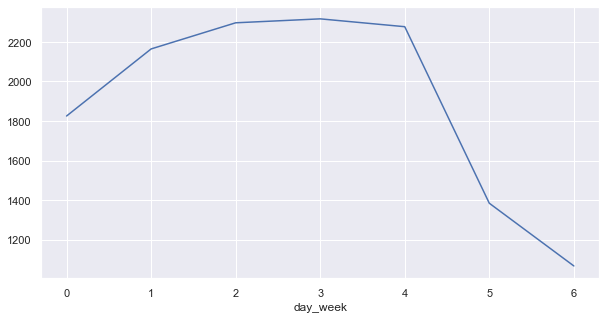

In [47]:
subway_df.groupby(Col.day_week).mean()[Col.entries_hourly].plot(figsize=fig_size)

Plot the hourly entries by hour of the day.

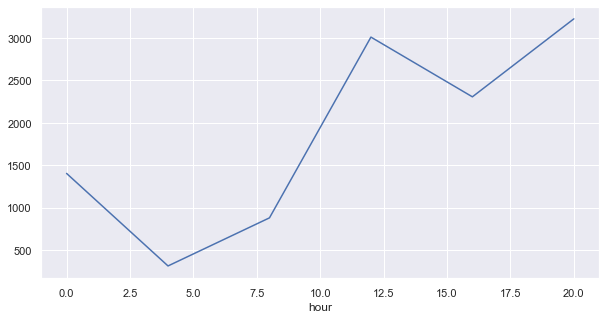

In [48]:
subway_df.groupby(Col.hour).mean()[Col.entries_hourly].plot(figsize=fig_size)

## Calculating hourly entries and exits

Assuming that we have only cumulative entry/exit counts,
we calculate the entries and exits per time period (for the following data set the time period is 4h).

In [49]:
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

In [50]:
def get_entries_and_exits_per_time_period(ridership_df):
    ridership_grouped = ridership_df.sort_values([Col.unit, Col.time]).groupby(Col.unit)[[Col.entries, Col.exits]]
    ridership_grouped_diff_df = ridership_grouped.diff()
    ridership_joined_df = ridership_df\
        .join(ridership_grouped_diff_df.rename(columns={Col.entries : 'ENTRIESn in 4h', Col.exits : 'EXITSn in 4h'}))\
        .sort_values([Col.unit, Col.time])
    return ridership_joined_df

get_entries_and_exits_per_time_period(ridership_df)

,UNIT,TIMEn,ENTRIESn,EXITSn,ENTRIESn in 4h,EXITSn in 4h
0,R051,00:00:00,3144312,1088151,NaN,NaN
2,R051,04:00:00,3144335,1088159,23.0,8.0
4,R051,08:00:00,3144353,1088177,18.0,18.0
6,R051,12:00:00,3144424,1088231,71.0,54.0
8,R051,16:00:00,3144594,1088275,170.0,44.0
1,R079,02:00:00,8936644,13755385,NaN,NaN
3,R079,06:00:00,8936658,13755393,14.0,8.0
5,R079,10:00:00,8936687,13755598,29.0,205.0
7,R079,14:00:00,8936819,13756191,132.0,593.0


## Combining Pandas data frames

Combine two data frames using `merge()`.

In [51]:
subway_tiny_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004', 'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11', '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120, 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774, 14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945, 40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564, -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_tiny_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11', '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945, 40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564, -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98, 30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

def combine_dataframes(subway_df: pd.DataFrame, weather_df: pd.DataFrame) -> pd.DataFrame:
    """
    Combines the data frames containing subway station entries/exists and weather data, respectively.
    The frames will be matched by date, time, and location.
    """
    return subway_df.merge(weather_df, on=[Col.date, Col.hour, Col.latitude, Col.longitude])

combine_dataframes(subway_tiny_df, weather_tiny_df)

,UNIT,DATEn,hour,ENTRIESn,EXITSn,latitude,longitude,pressurei,fog,rain,tempi,wspdi
0,R003,05-01-11,0,4388333,2911002,40.689945,-73.872564,30.24,0,0,52.0,8.1
1,R003,05-02-11,0,4388348,2911036,40.689945,-73.872564,30.32,0,0,48.9,6.9
2,R003,05-03-11,0,4389885,2912127,40.689945,-73.872564,30.14,0,0,54.0,3.5
3,R003,05-04-11,0,4391507,2913223,40.689945,-73.872564,29.98,0,0,57.2,15.0
4,R003,05-05-11,0,4393043,2914284,40.689945,-73.872564,30.01,0,0,48.9,15.0
5,R004,05-01-11,0,14656120,14451774,40.691320,-73.867135,30.24,0,0,52.0,8.1
6,R004,05-02-11,0,14656174,14451851,40.691320,-73.867135,30.32,0,0,48.9,6.9
7,R004,05-03-11,0,14660126,14454734,40.691320,-73.867135,30.14,0,0,54.0,3.5
8,R004,05-04-11,0,14664247,14457780,40.691320,-73.867135,29.98,0,0,57.2,15.0
9,R004,05-05-11,0,14668301,14460818,40.691320,-73.867135,30.01,0,0,48.9,15.0


## Plotting with Pandas data frames

Plot the ridership depending on the rain, as a bar diagram.

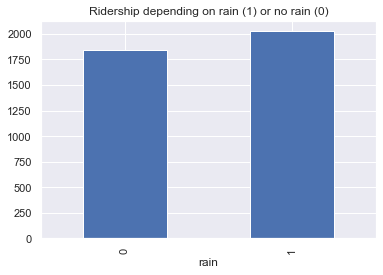

In [52]:
subway_df.groupby(Col.rain)[Col.entries_hourly].mean().sort_index()\
    .plot(kind='bar', title='Ridership depending on rain (1) or no rain (0)')

Create a [scatterplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)
of subway stations with latitude/longitude as axes and ridership as point size.
We additionally use a [colormap](https://matplotlib.org/examples/color/colormaps_reference.html)
so that the points have different colors depending on the value.

Note: in pandas 1.1.5, the x axis disappears when adding colors to the scatter plot.
A [workaround](https://stackoverflow.com/a/43579371) is to explicitly provide an `ax` parameter.
Should this behaviour be fixed in a future version, then the workaround can be removed.

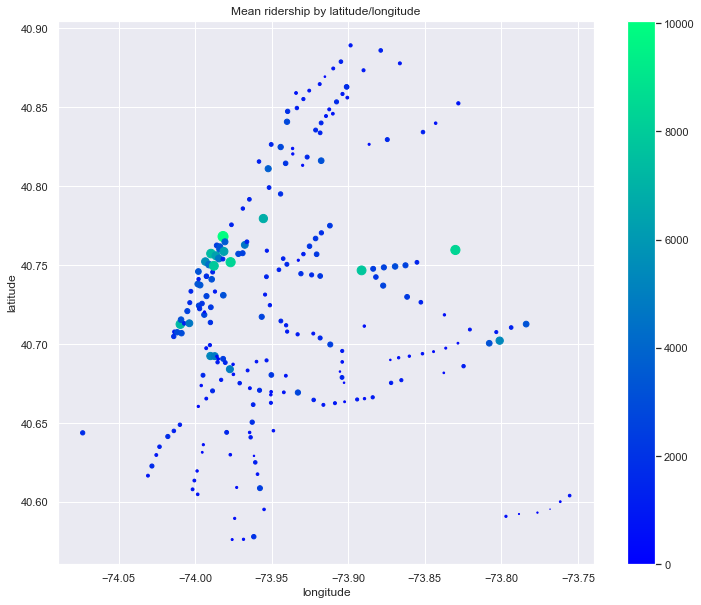

In [53]:
df = subway_df.groupby([Col.longitude, Col.latitude], as_index=False)[Col.entries_hourly].mean()
point_sizes = df[Col.entries_hourly]/100
point_colors = df[Col.entries_hourly]
_, ax = plt.subplots() # workaround. can be removed as soon as plotting works with color parameters
df.plot.scatter(x=Col.longitude, y=Col.latitude, s=point_sizes,
                title="Mean ridership by latitude/longitude",
                c=point_colors, colormap='winter',
                ax=ax,
                figsize=(12, 10))

## Three-dimensional data


Multi-dimensional data can be representing with
[MultiIndex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html).

In [54]:
midx = pd.MultiIndex(levels=[['a1', 'a2', 'a3'], ['b1', 'b2', 'b3']],
                     codes=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]])
midx

MultiIndex([('a1', 'b1'),
            ('a1', 'b2'),
            ('a1', 'b3'),
            ('a2', 'b1'),
            ('a2', 'b2'),
            ('a2', 'b3'),
            ('a3', 'b1'),
            ('a3', 'b2'),
            ('a3', 'b3')],
           )

In [55]:
df = pd.DataFrame([
    [110, 111, 112],
    [120, 121, 122],
    [130, 131, 112],
    [210, 211, 212],
    [220, 221, 222],
    [230, 231, 232],
    [310, 311, 312],
    [320, 321, 322],
    [330, 331, 332]],
    index=midx)
df

0    1    2
a1 b1  110  111  112
   b2  120  121  122
   b3  130  131  112
a2 b1  210  211  212
   b2  220  221  222
   b3  230  231  232
a3 b1  310  311  312
   b2  320  321  322
   b3  330  331  332

In [56]:
df.loc['a1']

,0,1,2
b1,110,111,112
b2,120,121,122
b3,130,131,112


In [57]:
df.loc['a1', 'b1']

0    110
1    111
2    112
Name: (a1, b1), dtype: int64

In [58]:
df.loc['a1', 'b1'][1]


111